In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

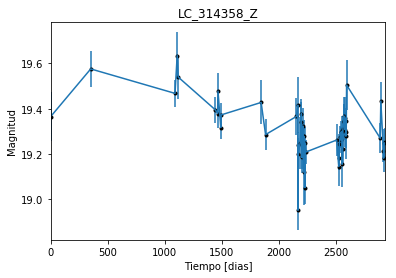

In [2]:
data = np.genfromtxt('LC_314358_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_314358_Z')
plt.savefig("LC_314358_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

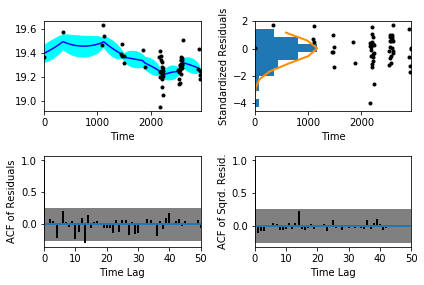

In [5]:
sample.assess_fit()

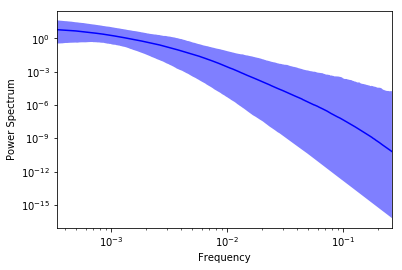

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

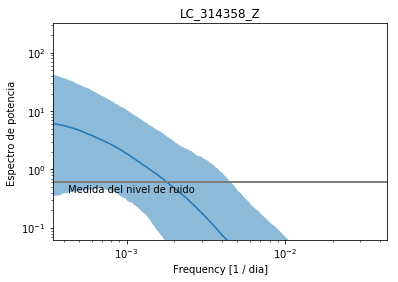

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_314358_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_314358_Z')

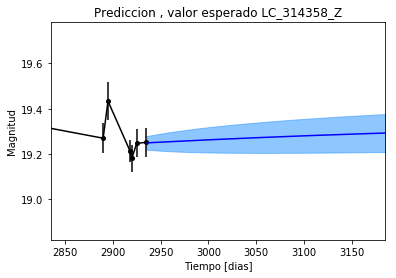

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_314358_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_314358_Z')

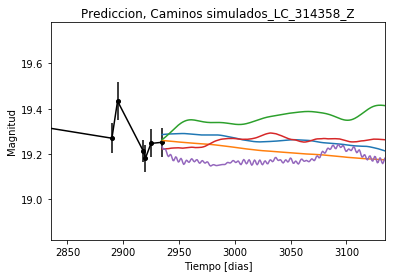

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_314358_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


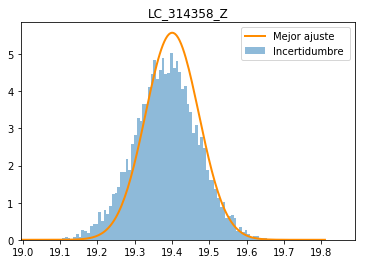

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_314358_Z')
plt.savefig("Mejor_ajuste_LC_314358_.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_314358_Z')

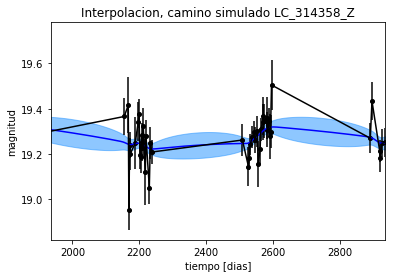

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_314358_Z')

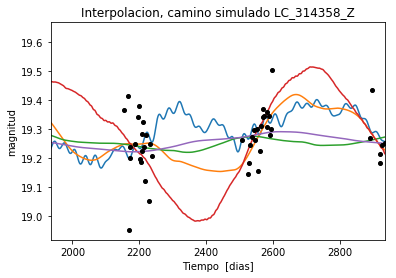

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 717.207495047
Median: 0.00760107541333
Standard deviation: 0.0982154107485
68% credibility interval: [ 0.00086756  0.10753543]
95% credibility interval: [  3.86298229e-04   3.93023481e-01]
99% credibility interval: [  3.51610737e-04   4.83695742e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 628.664683192
Median: 0.00173070414589
Standard deviation: 0.0430158160072
68% credibility interval: [ 0.00050203  0.0198944 ]
95% credibility interval: [ 0.0003575   0.14426126]
99% credibility interval: [ 0.00034463  0.28796629]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 884.73208094
Median: 0.0143703586567
Standard deviation

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2064.972281
Median: 81.4403776604
Standard deviation: 1.58988918772
68% credibility interval: [ 79.56565835  82.50177728]
95% credibility interval: [ 77.12711919  83.10397975]
99% credibility interval: [ 74.97245472  83.40693883]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 991.386619184
Median: 0.40142662705
Standard deviation: 1.0846966586
68% credibility interval: [ 0.04841294  2.05141394]
95% credibility interval: [ 0.01444448  3.61456301]
99% credibility interval: [ 0.01027902  5.07666082]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 461.715877574
Median: 0.184894826635
Standard deviation: 2.33731257584
68% credibility interval: [ 0.00780772  2.52790453]
95% credibility interval: [  6.74844924e-04 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12312.657658
Median: 1.94354844339e-33
Standard deviation: 6.85895412314e+62
68% credibility interval: [  5.62711537e-81   2.52161702e-04]
95% credibility interval: [  8.98992513e-106   5.03529244e+026]
99% credibility interval: [  4.98940615e-113   6.86829106e+044]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1646.1256222
Median: 19.3560809171
Standard deviation: 0.0709221663074
68% credibility interval: [ 19.29863312  19.41473757]
95% credibility interval: [ 19.2163803   19.49821298]
99% credibility interval: [ 19.11711361  19.58104954]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 295.580866543
Median: 0.00582878166394
Standard deviation: 0.130143505428
68% credibility interval: [ 0.          0.20473447]
95% credibility interval: [ 0.         0.4622763]
99% credibility interval: [ 0.          0.51063804]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 295.580866543
Median: 0.00582878166394
Standard deviation: 0.130143505428
68% credibility interval: [ 0.          0.20473447]
95% credibility interval: [ 0.         0.4622763]
99% credibility interval: [ 0.          0.51063804]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 838.508161007
Median: 0.0
Standard deviation: 0.00069994753046
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2064.972281
Median: 81.4403776604
Standard deviation: 1.58988918772
68% credibility interval: [ 79.56565835  82.50177728]
95% credibility interval: [ 77.12711919  83.10397975]
99% credibility interval: [ 74.97245472  83.40693883]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2820.9666122
Median: 0.0150186801558
Standard deviation: 0.0249560082619
68% credibility interval: [ 0.0078243   0.03203655]
95% credibility interval: [ 0.004355    0.07381222]
99% credibility interval: [ 0.00285072  0.14389245]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2361.16431402
Median: 1.08786433149
Standard deviation: 0.165197683058
68% credibility interval: [ 0.95001914  1.26231561]
95% credibility interval: [ 0.82152247  1.47543109]
99% credibility interval: [ 0.74831593  1.63602971]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 894.295890399
Median: 3.86754040566e-05
Standard deviation: 0.0113838197448
68% credibility interval: [  3.97704309e-07   1.08839259e-03]
95% credibility interval: [  2.16735738e-31   2.31344597e-02]
99% credibility interval: [  5.00693867e-48   6.94590807e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 717.207495047
Median: (-0.0477589653558-0.31089372795j)
Standard deviation: 1.02444053968
68% credibility interval: [-0.67566506-0.69187076j -0.00545103-0.00569662j]
95% credibility interval: [ -2.46943936e+00+0.j         -2.42718336e-03-0.0018654j]
99% credibility interval: [ -3.03914998e+00+0.j          -2.20923542e-03-0.58333813j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 628.664683192
Median: (-0.0108743348605+0.0405374660036j)
Standard deviation: 0.861224922797
68% credibility interval: [-0.12500020+0.52245631j -0.00315433+0.04950843j]
95% credibility interval: [-0.90642024+1.89500267j -0.00224626+0.j        ]
99% credibility interval: [-1.80934556 +9.56686915e-01j -0.00216540 +7.62227149e-04j]
Posterior sum